### Task C: Clustering: WeatherAUS Dataset

Import libraries

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Load weather dataset

In [13]:
weather_df = pd.read_csv('weather.csv')
weather_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Drop categorical data

In [14]:
#drop categorical data
df = weather_df.drop(['RainToday', 'RainTomorrow'], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


Normalise data

In [15]:
#normalise
x = df.values[:,1:] # all rows, and all columns except the first one i.e the index
x = np.nan_to_num(x) # handle missing values... replace NaN with zero... 
normalised_dataset = StandardScaler().fit_transform(x)
normalised_dataset

array([[-0.01620475, -0.20358073,  0.40779566, ...,  0.31297023,
         0.01724645,  0.08573194],
       [ 0.28078019, -0.27509664,  0.40779566, ...,  0.31523499,
         0.06193983,  0.41315549],
       [ 0.36177609, -0.27509664,  0.5279215 , ...,  0.31814683,
         0.6280559 ,  0.26908913],
       ...,
       [ 0.52376787, -0.27509664, -0.01264476, ...,  0.34435335,
        -0.63825637,  0.64890045],
       [ 0.53726719, -0.27509664, -0.55321102, ...,  0.34338274,
        -0.25091379,  0.63580351],
       [-3.10754799, -0.27509664, -2.23497271, ...,  0.34791227,
        -0.26581159, -0.03214054]])

Apply K-means clustering

In [16]:
num_of_clusters = 6 #play with values from 2 to 6 
k_means = KMeans(init='k-means++', n_clusters=num_of_clusters, n_init= 12)
k_means.fit(normalised_dataset)
labels = k_means.labels_
print(labels)

[1 5 0 ... 5 5 2]


Assign labels to each row in the dataframe

In [17]:
#assign labels to each row in the dataframe
df["cluster_km"] = labels
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,cluster_km
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,5
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,5


Centroid values by averaging the features in each cluster.

In [18]:
#Centroid values by averaging the features in each cluster.
df.groupby('cluster_km').mean()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
cluster_km,,,,,,,,,,,,
0,17.101534,33.122862,0.223009,45.033672,17.629294,19.941295,43.016460,24.672719,1014.656695,1011.288770,24.169373,31.466891
1,11.448646,19.638251,2.730465,54.387466,23.557299,28.246855,68.739025,57.570323,1015.472260,1014.137636,15.170469,17.920344
2,7.215965,17.227619,1.757920,30.918436,9.324268,13.702197,81.572879,60.113583,1021.898699,1019.641697,11.210730,16.032861
3,9.628076,20.987107,1.926489,38.397355,10.989796,14.399607,72.974493,54.003400,1018.165753,1016.454400,14.718349,19.470235
4,16.996179,23.147609,51.838879,47.950345,17.785809,20.999114,87.391958,75.388489,1012.077635,1010.577097,19.328817,21.417249
5,15.331259,26.711756,1.163426,35.682869,11.121998,17.431610,68.028257,51.252258,1016.953943,1014.196227,20.407761,24.970745


Show distribution of clusters based on MinTemp, and MaxTemp  

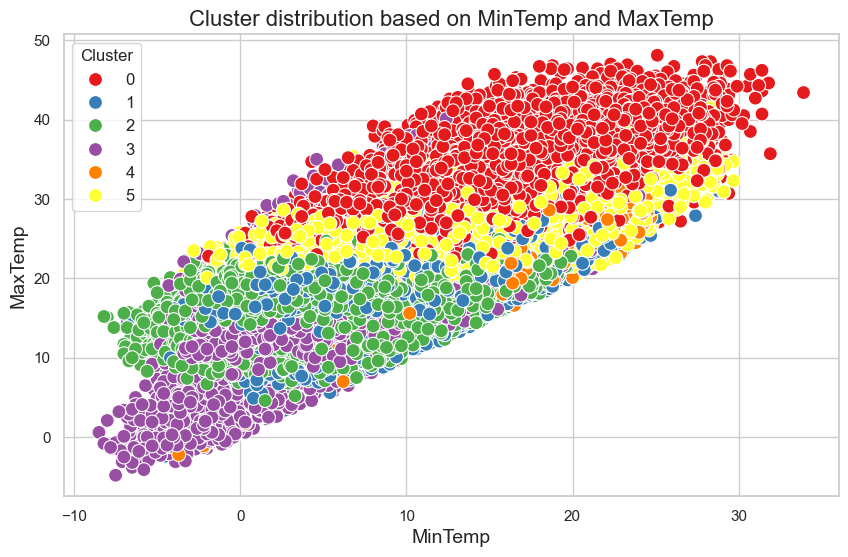

In [19]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='cluster_km', palette='Set1', s=100)
	
# Adding titles and labels
plt.title('Cluster distribution based on MinTemp and MaxTemp', fontsize=16)
plt.xlabel('MinTemp', fontsize=14)
plt.ylabel('MaxTemp', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()

3d plot mintemp, maxtemp, rainfall

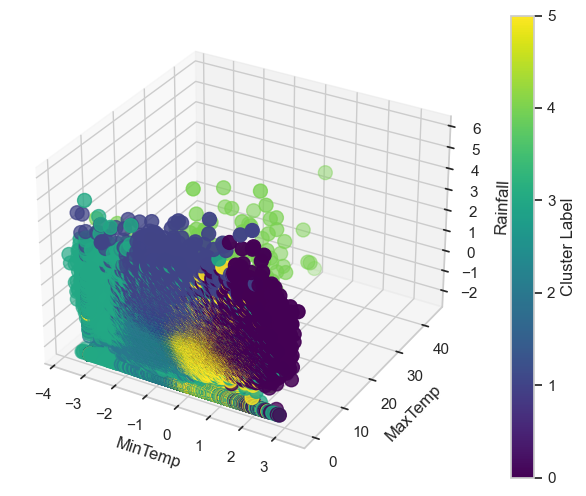

In [20]:
# Create the figure and add 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set labels for axes
ax.set_xlabel('MinTemp')
ax.set_ylabel('MaxTemp')
ax.set_zlabel('Rainfall')

# Create a scatter plot
scatter = ax.scatter(normalised_dataset[:, 0], normalised_dataset[:, 1], normalised_dataset[:, 2], c=labels, cmap='viridis', s=100)

# Create a color bar
plt.colorbar(scatter, label='Cluster Label')

# Show the plot
plt.show()